## **<span style="color:red">한국인의 삶을 파악하라</span>** ## 
***
#### **'한국복지패널 데이터' 분석 준비하기** ####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
raw_welfare=pd.read_spss("Koweps_hpwc14_2019_beta2.sav")
welfare=raw_welfare.copy()
# 규모가 큰 조사 자료는 데이터의 특징을 설명해 놓은 코드북을 함께 제공함

In [2]:
# 변수 이름을 알아보기 쉬운 단어로 바꾸기
welfare=welfare.rename(columns={"h14_g3":"sex", # 성별
                                "h14_g4":"birth", # 태어난 연도
                                "h14_g10":"marriage_type", # 혼인 상태
                                "h14_g11":"religion", # 종교
                                "p1402_8aq1":"income", # 월급
                                "h14_eco9":"code_job", # 직업 코드
                                "h14_reg7":"code_region"}) # 지역코드
# 데이터 분석 절차: 변수 검토 및 전처리 - > 변수 간 관계 분석

#### **성별에 따른 월급 차이- 성별에 따라 월급이 다를까?** ####

<Axes: xlabel='sex', ylabel='count'>

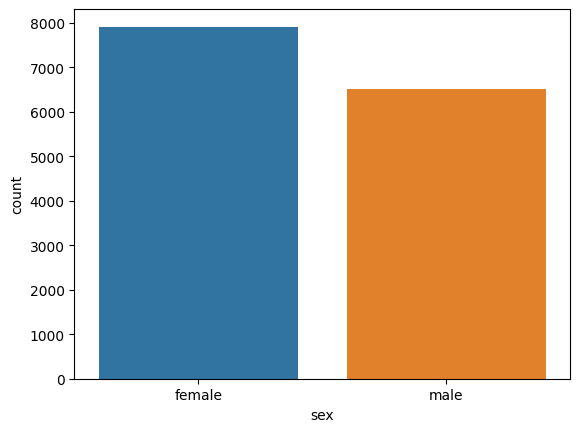

In [5]:
sns.countplot(data=welfare,x="sex")

<Axes: xlabel='income', ylabel='Count'>

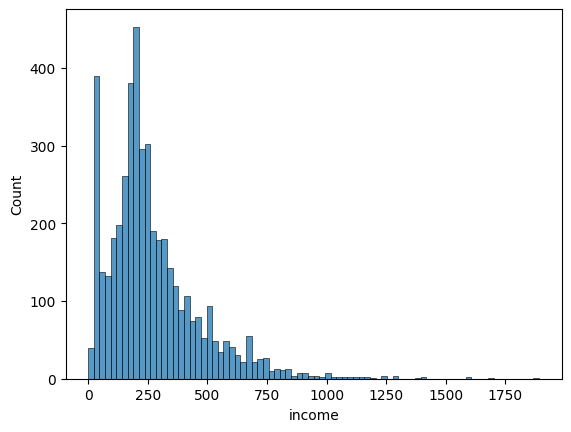

In [7]:
sns.histplot(data=welfare,x='income') # 히스토그램 만들기

9884


<Axes: xlabel='sex', ylabel='mean_income'>

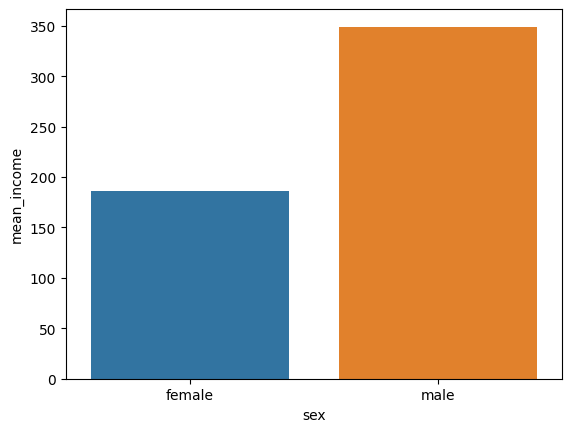

In [8]:
print(welfare["income"].isna().sum()) # 결측치 확인
sex_income\
=welfare.dropna(subset=["income"])\
    .groupby("sex",as_index=False)\
    .agg(mean_income=("income","mean"))
sns.barplot(data=sex_income,x="sex",y="mean_income")

#### **나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?** ####

<Axes: xlabel='birth', ylabel='Count'>

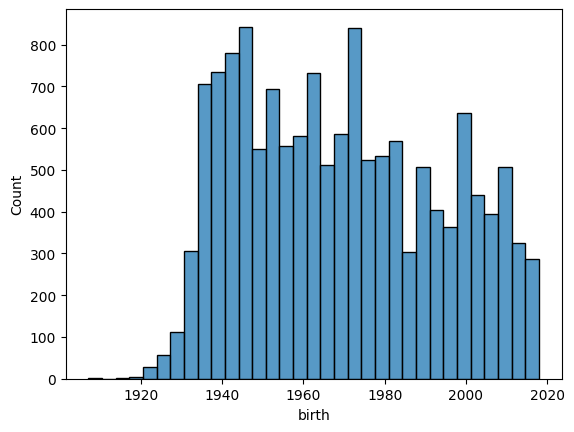

In [10]:
sns.histplot(data=welfare,x="birth")

<Axes: xlabel='age', ylabel='Count'>

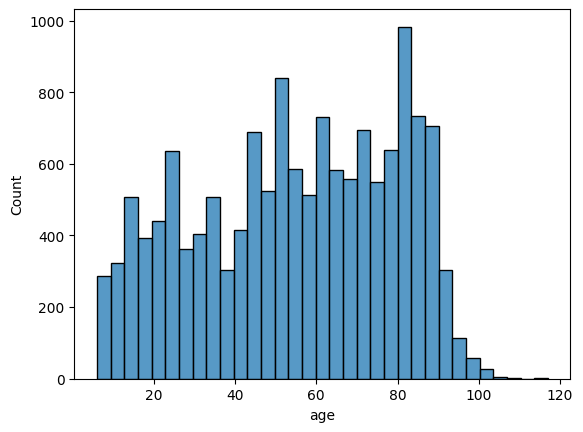

In [11]:
welfare["age"]=2023-welfare["birth"]+1 # 나이 파생변수 생성
sns.histplot(data=welfare,x="age")

C:\Users\82106\AppData\Local\Temp\ipykernel_2292\509534056.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=age_income,x="age",y="mean_income",ci=None)


<Axes: xlabel='age', ylabel='mean_income'>

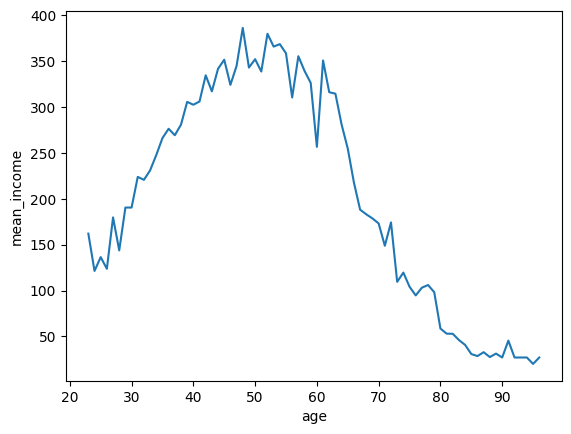

In [12]:
#나이와 월급의 관계 분석하기
age_income\
=welfare.dropna(subset=["income"])\
        .groupby("age",as_index=False)\
        .agg(mean_income=("income","mean"))
sns.lineplot(data=age_income,x="age",y="mean_income",ci=None)

#### **연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?** ####

<Axes: xlabel='ageg', ylabel='mean_income'>

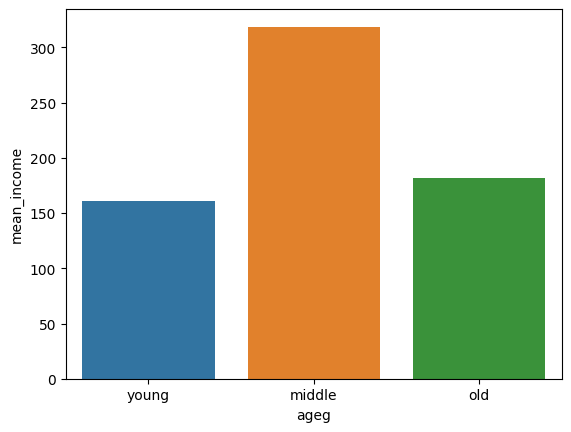

In [13]:
# 연령대 파생변수 생성
welfare=welfare.assign(ageg=lambda x: np.where(x["age"]<30,"young",np.where(x["age"]<=59,"middle","old")))
ageg_income\
=welfare.dropna(subset=["income"])\
        .groupby("ageg",as_index=False)\
        .agg(mean_income=("income","mean"))
sns.barplot(data=ageg_income,x="ageg",y="mean_income",order=["young","middle","old"])

#### **연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?** ####

<Axes: xlabel='ageg', ylabel='mean_income'>

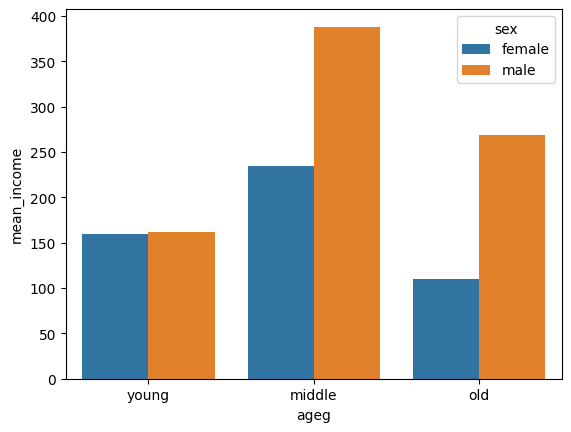

In [14]:
sex_income=\
 welfare.dropna(subset=["income"])\
        .groupby(["ageg","sex"], as_index=False)\
        .agg(mean_income=("income","mean"))
sns.barplot(data=sex_income,x="ageg",y="mean_income",hue="sex",order=["young","middle","old"])

<Axes: xlabel='age', ylabel='mean_income'>

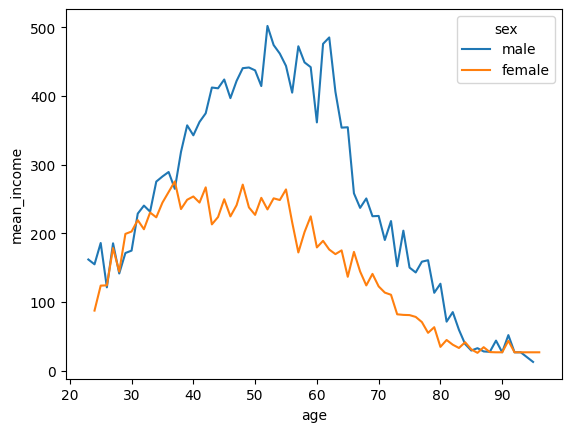

In [15]:
# 나이 및 성별 월급 차이 분석하기
sex_age=\
 welfare.dropna(subset=["income"])\
        .groupby(["age","sex"])\
        .agg(mean_income=("income","mean"))

sns.lineplot(data=sex_age,x="age",y="mean_income",hue="sex")

#### **직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?** ####

<Axes: xlabel='mean_income', ylabel='job'>

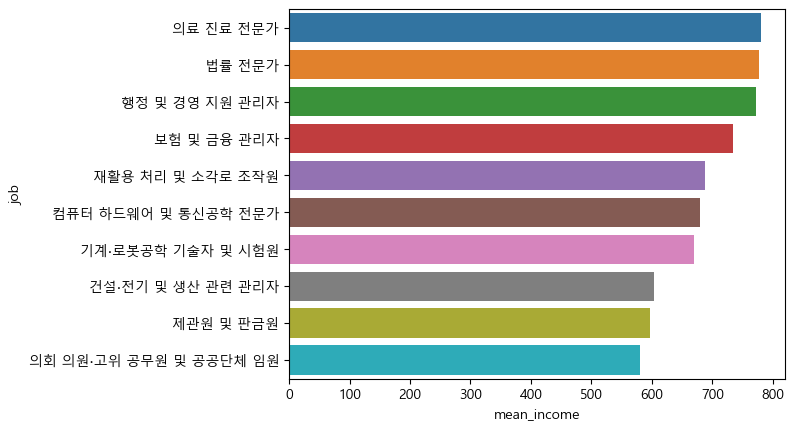

In [19]:
# 그래프 만들기
top10=job_income.sort_values("mean_income",ascending=False).head(10)

import matplotlib.pyplot as plt
plt.rcParams.update({"font.family":"Malgun Gothic"}) # 변수 이름이 한글일 때 깨질 수 있음 - > 폰트 변경
sns.barplot(data=top10,x="mean_income",y="job")

[(0.0, 800.0)]

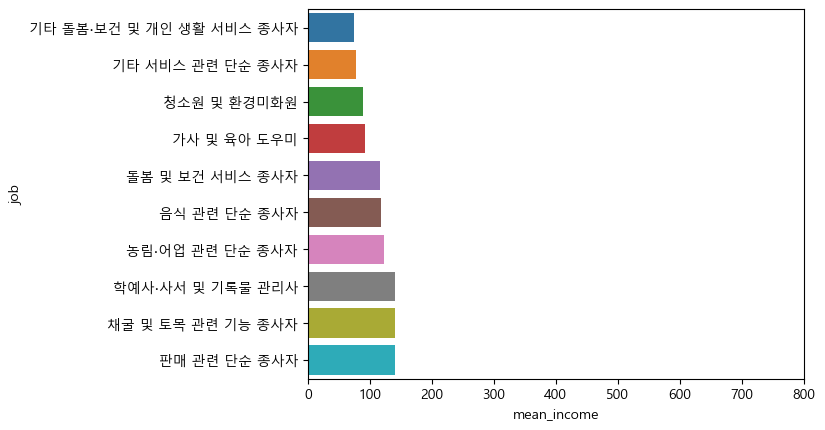

In [20]:
bottom10=job_income.sort_values("mean_income").head(10)
sns.barplot(data=bottom10,x="mean_income",y="job").set(xlim=[0,800])

#### **성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?** ####

Axes(0.125,0.11;0.775x0.77)


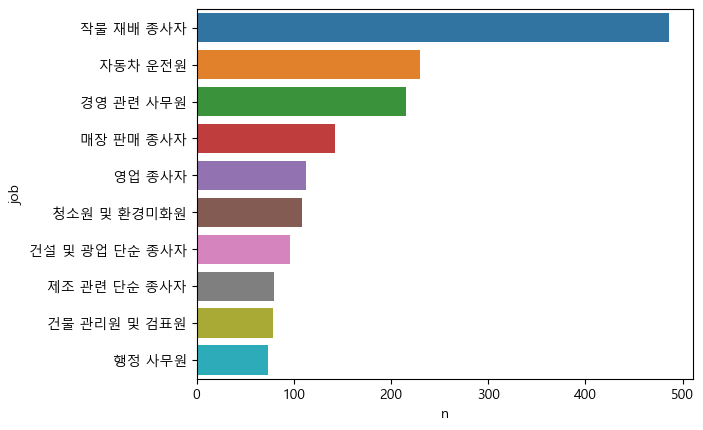

In [21]:
# 남성 직업 빈도 상위 10개 추출 
job_male=\
     welfare.dropna(subset=["job"])\
            .query("sex=='male'")\
            .groupby("job",as_index=False)\
            .agg(n=("job","count"))\
            .sort_values("n",ascending=False)\
            .head(10)

# 여성 직업 빈도 상위 10개 추출 
job_female=\
     welfare.dropna(subset=["job"])\
            .query("sex=='female'")\
            .groupby("job",as_index=False)\
            .agg(n=("job","count"))\
            .sort_values("n",ascending=False)\
            .head(10)

print(sns.barplot(data=job_male,x="n",y="job"))

Axes(0.125,0.11;0.775x0.77)


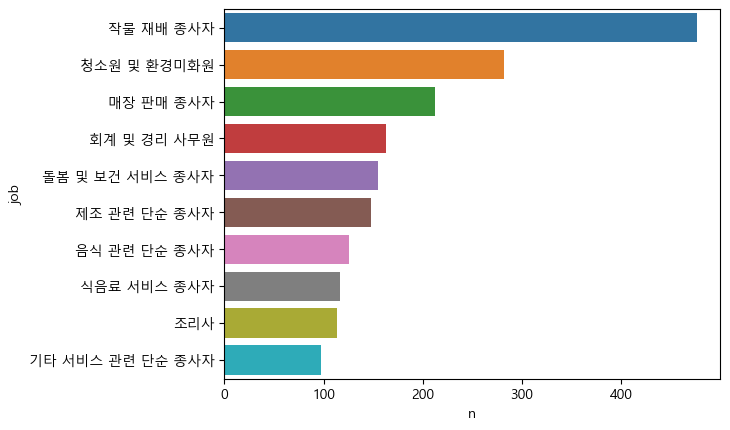

In [22]:
print(sns.barplot(data=job_female,x="n",y="job"))

#### **종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?** ####

<Axes: xlabel='religion', ylabel='proportion'>

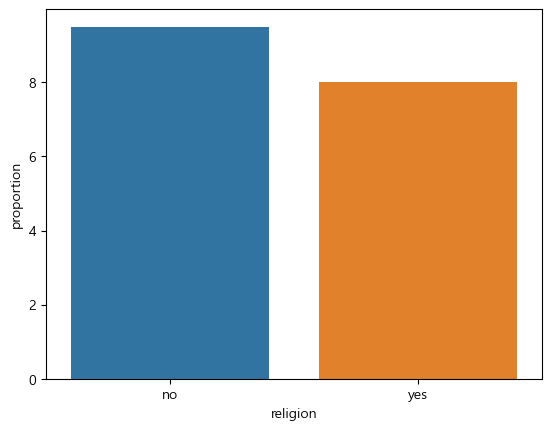

In [28]:
# 그래프 만들기
rel_div=rel_div.query("marriage=='divorce'")\
                .assign(proportion=rel_div["proportion"]*100)\
                .round(1)
sns.barplot(data=rel_div,x='religion',y='proportion')

<Axes: xlabel='ageg', ylabel='proportion'>

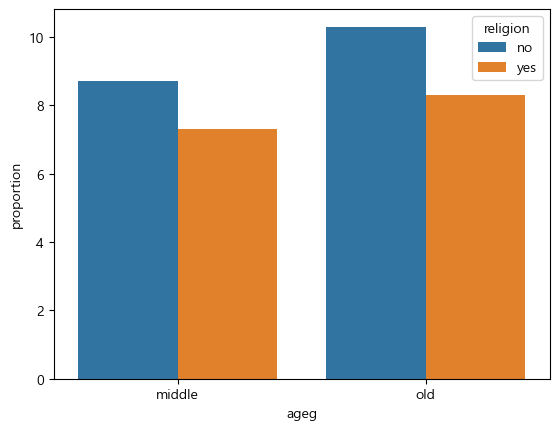

In [29]:
# 실습하기 
# 연령대 및 종교 유무에 따른 이혼율 분석하기
age_div=welfare.query("marriage !='etc' & ageg !='young'")\
                .groupby(["ageg","religion"],as_index=False)\
                ["marriage"]\
                .value_counts(normalize=True)
age_div=age_div.query("marriage=='divorce'").assign(proportion=age_div["proportion"]*100).round(1)
sns.barplot(data=age_div,x="ageg",y="proportion",hue="religion")

#### **지역별 연령대 비율 - 어느 지역에 노년층이 많을까?** ####

,region,ageg,proportion
0,강원/충북,old,50.9
1,강원/충북,middle,28.8
2,강원/충북,young,20.2
3,광주/전남/전북/제주도,old,49.2
4,광주/전남/전북/제주도,middle,30.7
5,광주/전남/전북/제주도,young,20.0
6,대구/경북,old,55.3
7,대구/경북,middle,28.1
8,대구/경북,young,16.7
9,대전/충남,old,45.4


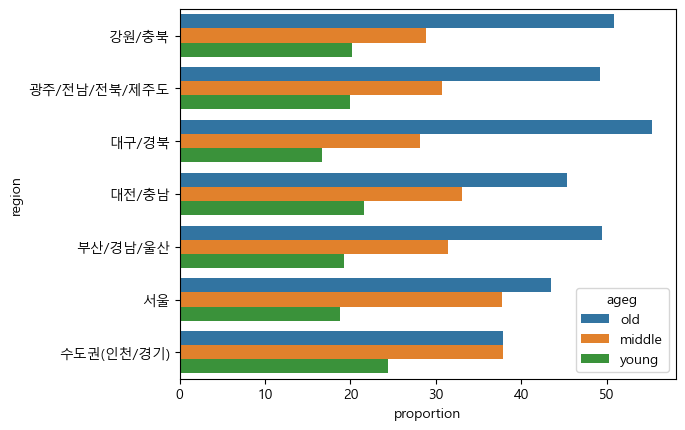

In [32]:
# 지역별 연령대 비율표 만들기
region_ageg=welfare.groupby("region",as_index=False)\
                    ["ageg"]\
                    .value_counts(normalize=True)

region_ageg=\
    region_ageg.assign(proportion=region_ageg["proportion"]*100)\
                .round(1)
sns.barplot(data=region_ageg,x="proportion",y="region",hue="ageg")
region_ageg

<Axes: ylabel='region'>

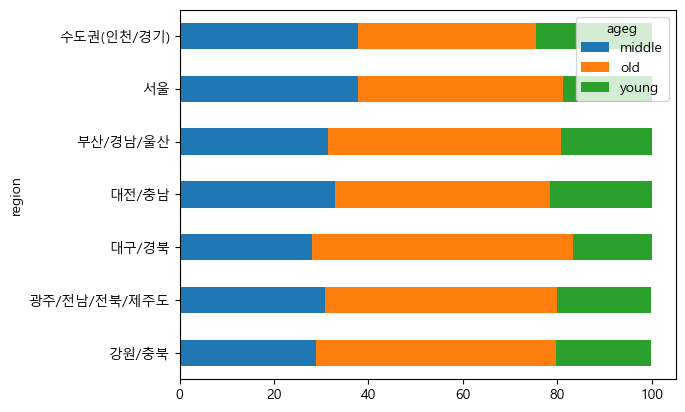

In [33]:
# 누적 비율 막대 그래프
# 피벗: 행과 열을 회전해 표의 구성을 바꾸는 작업
pivot_df=\
    region_ageg[["region","ageg","proportion"]].pivot(index="region", # 지역을 기준으로 회전
                                                      columns="ageg",
                                                      values="proportion")
pivot_df.plot.barh(stacked=True)

<Axes: ylabel='region'>

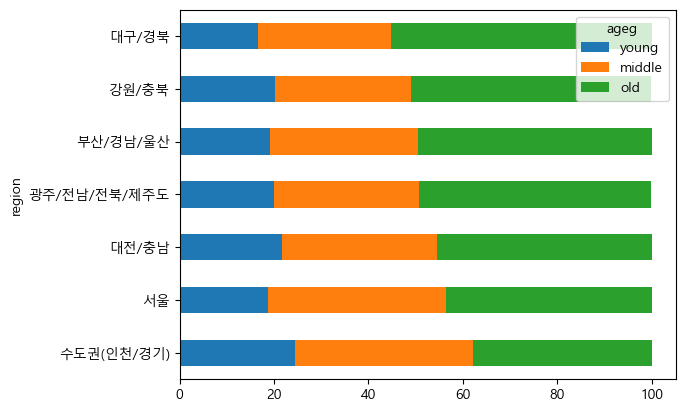

In [34]:
# 막대 정렬하기
render_df=pivot_df.sort_values("old")[["young","middle","old"]]
render_df.plot.barh(stacked=True)